<a href="https://colab.research.google.com/github/GOPIKAV77/Python/blob/main/FIRST_SECOND_ORDER_MODELS_SALES_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [4]:
df = pd.read_csv("sales.csv",encoding='latin-1' )

In [5]:
df.head(3)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium


**SCATTERPLOT**

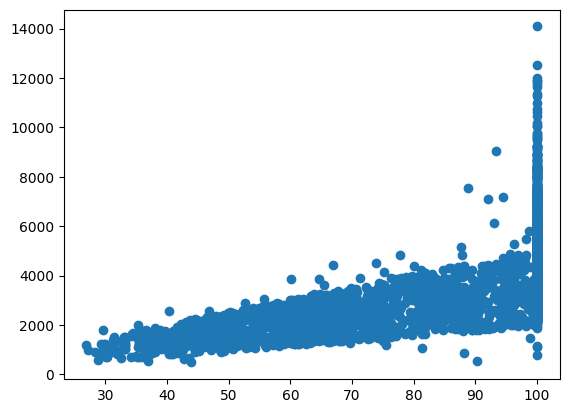

In [34]:
plt.scatter(df["PRICEEACH"],df["SALES"])

**FIRST-ORDER MODEL**

In [44]:
x = df["PRICEEACH"]
y = df["SALES"]

x2 = sm.add_constant(x)
model = sm.OLS(y,x2)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  SALES   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     2152.
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:07:05   Log-Likelihood:                -24430.
No. Observations:                2823   AIC:                         4.886e+04
Df Residuals:                    2821   BIC:                         4.888e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1470.5900    111.410    -13.200      0.000   -1689.043   -1252.137
PRICEEACH     60.0594      1.295     46.391      0.000      57.521      62.598
==============================================================================
Omnibus:                      781.678   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2800.049
Skew:                           1.346   Prob(JB):                         0.00
Kurtosis:                       7.069   Cond. No.                         367.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**STANDARDISED RESIDUAL PLOT**

In [45]:
m = model.resid_pearson
m

array([-1.01342887, -0.46800609, -0.24151649, ...,  0.63585539,
       -0.10908061,  0.44321329])

In [46]:
y_ = model.predict(x2)
y_

,0
0,4277.091275
1,3415.239378
2,4219.434284
3,3529.952766
4,4535.346547
...,...
2818,4535.346547
2819,4535.346547
2820,4535.346547
2821,2267.504900


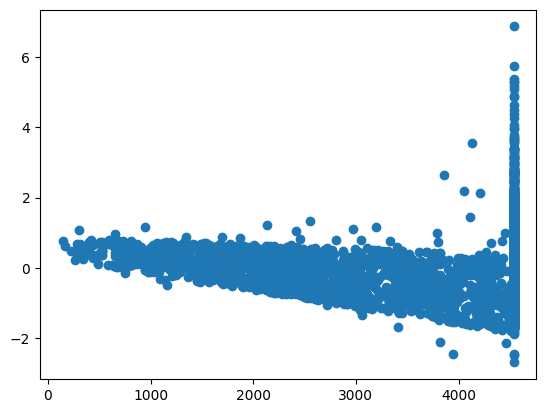

In [47]:
plt.scatter(y_,m)

**SECOND ORDER MODEL**

In [48]:
x_sq = (x**2)
x_sq

,PRICEEACH
0,9158.4900
1,6617.8225
2,8975.6676
3,6932.2276
4,10000.0000
...,...
2818,10000.0000
2819,10000.0000
2820,10000.0000
2821,3873.8176


In [49]:
x_k = np.column_stack((x,x_sq))
x_n = sm.add_constant(x_k)
model1 = sm.OLS(y,x_n)
model1 = model1.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  SALES   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     1203.
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:07:17   Log-Likelihood:                -24359.
No. Observations:                2823   AIC:                         4.872e+04
Df Residuals:                    2820   BIC:                         4.874e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2935.1939    382.200      7.680      0.000    2185.773    3684.615
x1           -70.6792     10.946     -6.457      0.000     -92.143     -49.215
x2             0.8820      0.073     12.024      0.000       0.738       1.026
==============================================================================
Omnibus:                      737.338   Durbin-Watson:                   1.614
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2727.830
Skew:                           1.255   Prob(JB):                         0.00
Kurtosis:                       7.110   Cond. No.                     1.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
e = model1.resid_pearson
e

array([-1.01800761, -0.18939889, -0.20029178, ...,  0.53971538,
        0.1207309 ,  0.73066347])

In [42]:
y_2 = model1.predict(x_n)


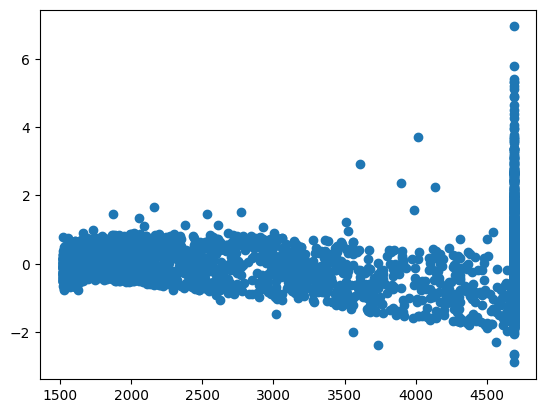

In [51]:
plt.scatter(y_2,e)